# Spoken Digit Experiment for Progressive Learning

This experiment will use an audio dataset named spoken_digit (https://github.com/Jakobovski/free-spoken-digit-dataset) to test the performance of progressive-learning on audio classification tasks. The dataset consists of 3,000 recordings of digit (from 0 to 9) pronounced in English, by 6 speakers: 

6 (speakers) x 10 (digits) x 50 (repetitions) = 3,000 (audio files) 

Think MNIST for audio.


### Import necessary packages and modules

In [1]:
import numpy as np


### Load spoken_digit data and extract features
To try on the up-to-date version of spoken_digit, we download the dataset from github repo (https://github.com/Jakobovski/free-spoken-digit-dataset) to our computer.

Then we use `librosa` to load audio file, and extract the **STFT** (Short-time Fourier transform) feature. Since each audio has different durations, the STFT spectrograms vary in width. For convenience, we regularize the STFT spectrograms all to 28 by 28 images, using .resize() function from `opencv`. 

**Please ensure that you have `librosa` and `opencv` installed to run this experiment.**


In [2]:
from spoken_digit_functions import load_spoken_digit

path_recordings = 'D:/Python Exploration/free-spoken-digit-dataset/recordings'

AudioData , X_spec_mini, Y_number, Y_speaker = load_spoken_digit(path_recordings)



In [3]:
AudioData

[array([-0.04544067, -0.02935791, -0.01849365, ..., -0.05535889,
        -0.03387451, -0.00045776], dtype=float32),
 array([ 0.00109863,  0.00054932,  0.00192261, ..., -0.00067139,
        -0.00106812,  0.00045776], dtype=float32),
 array([-0.00534058, -0.01553345,  0.00894165, ..., -0.00283813,
        -0.00418091, -0.00271606], dtype=float32),
 array([ 0.00314331,  0.00421143,  0.00598145, ..., -0.0083313 ,
        -0.00726318, -0.00527954], dtype=float32),
 array([0.00204468, 0.0027771 , 0.00317383, ..., 0.00491333, 0.00302124,
        0.00500488], dtype=float32),
 array([-0.00421143, -0.00378418, -0.00323486, ..., -0.00302124,
        -0.00238037, -0.00210571], dtype=float32),
 array([0.00036621, 0.00119019, 0.00546265, ..., 0.00253296, 0.0020752 ,
        0.003479  ], dtype=float32),
 array([-0.01364136, -0.01242065, -0.01965332, ...,  0.00402832,
         0.00320435,  0.00192261], dtype=float32),
 array([0.00216675, 0.00299072, 0.00332642, ..., 0.00177002, 0.00137329,
        0.0

***Before running progressive learning, let's take a look at what we have now!***

In [4]:
# Play the audio
#from spoken_digit_functions import play_audio
import IPython.display as ipd
num = 2999
#play_audio(num, AudioData, Y_number, Y_speaker)
print('This is a number',Y_number[num],'spoken by speaker',Y_speaker[num].upper(),
      '\nDuration:',AudioData[num].shape[0],
      'samples in',AudioData[num].shape[0]/8000,'seconds')
ipd.Audio(AudioData[num], rate=8000)

This is a number 9 spoken by speaker Y 
Duration: 3507 samples in 0.438375 seconds


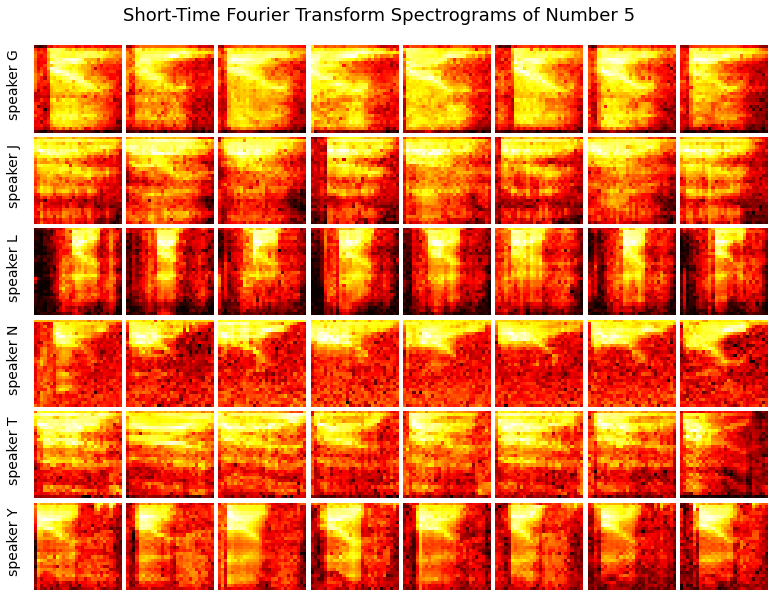

In [5]:
from spoken_digit_functions import display_spectrogram
num = 5
display_spectrogram(X_spec_mini, Y_number, Y_speaker, num)

### Run progressive learning
We divide the tasks by speaker, and check whether the later learned task will transfer knowledge to the former task.

Here are the major steps:
1. Shuffle the list of speakers.
2. Pick the first speaker. Split data into train set and test set. Add the first progressive learning task and learn on the train set. Make predictions on the test set. 
3. One by one, the rest of the speakers come as train data. We add transformers using these data, and backpropagate to the first task. Make predictions on the test set in step 2, using task 1.
4. Repeat hundreds of times and average the result.

In [6]:
# Flattening
X_all = np.array(X_spec_mini).reshape(3000,-1) # (3000, 784)
Y_all = np.array(Y_number).astype(int) # (3000,)
Y_all_speaker = np.array(Y_speaker) # (3000,), type: string

In [7]:
from spoken_digit_functions import run_experiment
accuracy_all_task = run_experiment(X_all, Y_all, Y_all_speaker, ntrees=19, num_repetition = 1)

task 0 speaker is  y
task 0 speaker is  n
task 0 speaker is  g
task 0 speaker is  t
task 0 speaker is  j
task 0 speaker is  l


In [8]:
from spoken_digit_functions import calculate_results
acc, bte, fte, te = calculate_results(accuracy_all_task)

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

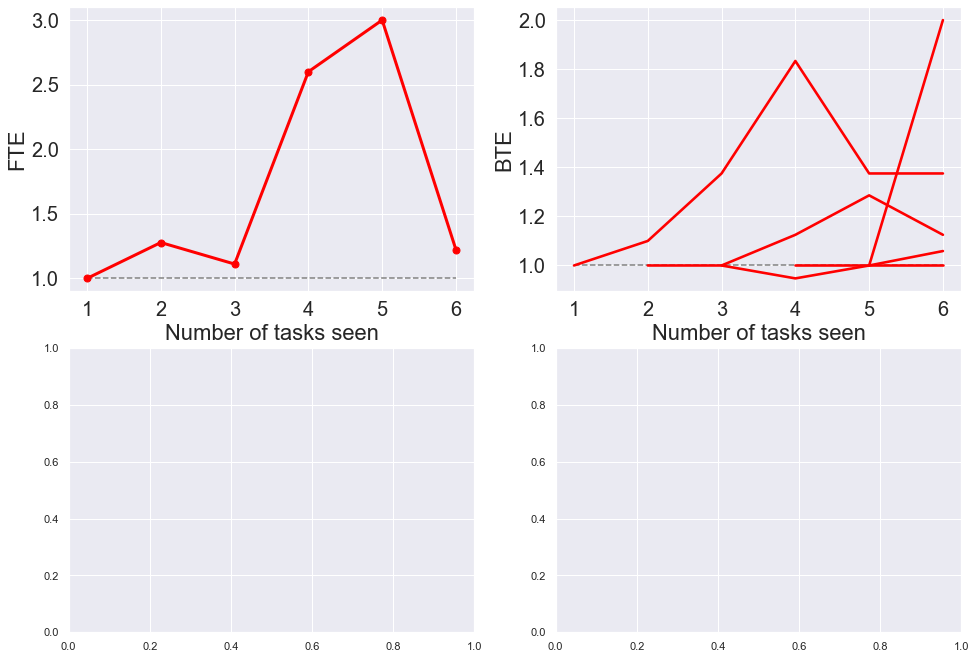

In [9]:
from spoken_digit_functions import plot_results
plot_results(acc, bte, fte, te)